# Paper Id & Team size 

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
import matplotlib.pyplot as plt

In [14]:
Paperid_author_df = pd.read_csv('/data02/MAG_PROCESSED_DATA/2019FILE/PaperAuthorAffiliation_2019.csv')

In [15]:
Paperid_author_df.groupby(['PaperId']).count()

,AuthorId,AffiliationId,AuthorSequenceNumber,OriginalAuthor,OriginalAffiliation
PaperId,,,,,
7100,4,4,4,4,4
255444,1,1,1,1,1
299788,1,0,1,1,0
526736,1,0,1,1,0
533592,1,0,1,1,0
...,...,...,...,...,...
3204966767,1,0,1,1,0
3204967588,2,0,2,2,0
3204967664,1,0,1,1,0


In [5]:
import os

### Paper title

In [3]:
papers_2019 = pd.read_csv('/data02/MAG_PROCESSED_DATA/2019FILE/MJ_PROCESSED_2019only.csv')

/home/munj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
papers_2019 = papers_2019[papers_2019['DocType']=='Journal']

In [12]:
set(papers_2019['DocType'])

{'Journal'}

In [17]:
paperid_title_dict = dict(zip(papers_2019['PaperId'], papers_2019['PaperTitle']))

In [18]:
Paperid_author_df['PaperTitle'] = Paperid_author_df['PaperId'].apply(lambda x: paperid_title_dict[x])

KeyError: 7100

In [23]:
papers_2019['PaperId']

143         2187741008
148         2191294727
395         2412796382
835         2565919305
860         2568408079
               ...    
66893899    2981391447
66893913    2991055411
66893921    2996467337
66893922    2996969815
66894111    3105085168
Name: PaperId, Length: 2300979, dtype: int64

# Load vector

In [3]:
vectors =  np.empty((0,768))
for i in range(28):
    directory = '/data02/MAG_PROCESSED_DATA/2019FILE/sBERT_vector_2019_'+str(i)+'.npy'
    vector = np.load(directory)
    vectors =np.append(vectors,vector,axis=0)
    del directory
    del vector

In [29]:
paper_id[:10]

[3183726375,
 3148778237,
 1609653630,
 3093772047,
 2957247302,
 3143057492,
 2187741008,
 2191294727,
 2412796382,
 2460650912]

In [8]:
vectors[6]

array([-1.05491841e+00,  2.96671063e-01,  3.58382791e-01, -4.12207237e-03,
       -2.28591144e-01,  1.86857935e-02,  9.64940786e-01,  9.93623137e-02,
        1.24944426e-01,  1.45698816e-01,  7.48598203e-02, -5.50933719e-01,
        3.96539778e-01,  5.42945415e-02, -6.64904177e-01, -6.39950275e-01,
       -3.91315818e-01,  4.18462366e-01,  4.13279295e-01, -7.72409439e-02,
       -4.18195546e-01, -6.76223934e-01, -4.74315286e-01,  1.15456605e+00,
       -2.61981905e-01, -1.19620048e-01,  6.22234344e-01, -3.33392352e-01,
        2.48942941e-01, -1.13251880e-02,  4.99129027e-01,  2.13630036e-01,
       -6.82715893e-01,  7.02435970e-01, -8.86753321e-01, -3.35167438e-01,
       -1.06850015e-02, -1.29097318e-02, -2.34332532e-01, -6.72544777e-01,
       -1.63292408e+00,  4.94307071e-01,  7.78383553e-01, -1.18069045e-01,
        1.95965618e-01, -4.78971869e-01, -3.12401682e-01,  4.63793516e-01,
       -4.40900505e-01,  9.44903195e-01, -3.40641707e-01,  4.54668812e-02,
       -3.70729893e-01, -

In [38]:
del vectors

In [6]:
with open("/data02/MAG_PROCESSED_DATA/2019FILE/PAPERID.txt", "rb") as fp:   #Pickling
    paper_id_full = pickle.load( fp)



In [7]:
paperid_vector_dict = dict(zip(paper_id_full, vectors))

In [26]:
papers_2019['Vector'] = papers_2019['PaperId'].apply(lambda x: paperid_vector_dict[x])

/home/munj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
papers_2019[['PaperId','Vector']].to_csv('/data02/MAG_PROCESSED_DATA/2019FILE/PAPERID_SPECTOR_VECTOR_JOURNAL.csv')

KeyboardInterrupt: 

In [33]:
papers_2019['PaperId'].to_csv('/data02/MAG_PROCESSED_DATA/2019FILE/PAPERID_JOURNAL.csv')

/home/munj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [9]:
paperid_vector_dict

In [16]:
paperid = set(paperid)

In [5]:
paperid = pd.read_csv('/data02/MAG_PROCESSED_DATA/2019FILE/PAPERID_JOURNAL.csv')

RuntimeError: dictionary changed size during iteration

In [46]:
del paperid_vector_dict 

In [47]:
paperid_vector_dict = dict(zip(paperid, papers_2019['Vector'] ))

In [67]:
len(paperid_vector_dict )

2300979

In [71]:
del paper_id

In [72]:
paper_id = papers_2019['PaperId']

In [74]:
paper_id_set = set(paper_id)

In [45]:
# df_new_2019 = pd.read_csv('/data02/MAG_PROCESSED_DATA/2019FILE/MJ_PROCESSED_2019only.csv')

/home/munj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
# del df_new_2019

In [49]:
# df_new_2019 = 1

# Mathcing Field

In [76]:
l = ['PaperId','FieldId','Score']

In [77]:

PaperId_FieldId_df = pd.DataFrame( columns=l)

for v,chunk in enumerate(pd.read_csv('/data02/mag/PaperFieldsOfStudy.txt', sep="\t", header=None,error_bad_lines=False,chunksize=50000000)):
    print(v)
    chunk = chunk[chunk[0].notna()]
    chunk = chunk[chunk[1].notna()]
    chunk = chunk[chunk[0].apply(lambda x: True if x in paper_id_set else False)]
    chunk.columns = l
    PaperId_FieldId_df  =pd.concat([PaperId_FieldId_df ,chunk])
    del chunk


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [78]:
PaperId_FieldId_df.to_csv('/data02/MAG_PROCESSED_DATA/2019FILE/PaperFieldsOfStudy_2019.csv',index_label=False)

In [34]:
PaperId_FieldId_df = pd.read_csv('/data02/MAG_PROCESSED_DATA/2019FILE/PaperFieldsOfStudy_2019.csv')

Text(0.5, 0, 'score')

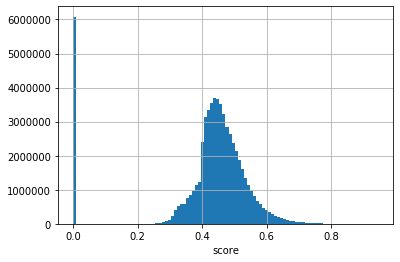

In [35]:
PaperId_FieldId_df['Score'].hist(bins=100)
plt.xlabel('score')

In [36]:
import matplotlib.pyplot as plt

In [39]:
PaperId_FieldId_df[PaperId_FieldId_df['PaperId']==2979186816]

,PaperId,FieldId,Score
1266971632,2979186816,3017775328,0.000000
1266971645,2979186816,10138342,0.411533
1266971658,2979186816,160735492,0.523712
1266971671,2979186816,182299520,0.474390
1266971684,2979186816,114350782,0.444741
1266971697,2979186816,2993628111,0.000000
1266971710,2979186816,3017436824,0.000000
1266971723,2979186816,27415008,0.403010
1266971736,2979186816,71924100,0.329688


In [22]:
len(set(PaperId_FieldId_df['FieldId']))

310299

## Field

In [40]:
field_column = ['FieldofstudyId','Rank','NormalizedName','DisplayName','MainType','Level','PaperCount','PaperFamilyCount','CitationCount','CreateDate']

In [41]:
import tqdm

In [42]:

FieldofStudy_df = pd.DataFrame( columns=field_column)

for chunk in pd.read_csv('/data02/mag/FieldsOfStudy.txt', sep="\t", header=None,chunksize=50000):
 
    chunk.columns = field_column
    FieldofStudy_df  =pd.concat([FieldofStudy_df ,chunk])
    del chunk


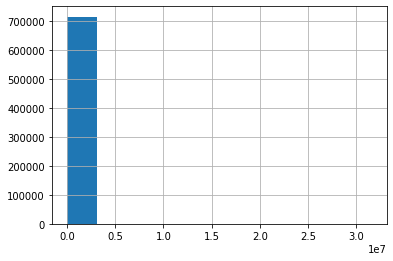

In [43]:
FieldofStudy_df['PaperCount'].hist(bins=10)

In [44]:
len(FieldofStudy_df[FieldofStudy_df['Level']==1])

292

In [45]:
FieldofStudy_df

,FieldofstudyId,Rank,NormalizedName,DisplayName,MainType,Level,PaperCount,PaperFamilyCount,CitationCount,CreateDate
0,417682,16946,night air,Night air,NaN,2,102,101,417,2016-06-24
1,1443462,16002,immobiliser,Immobiliser,NaN,2,220,215,1026,2016-06-24
2,1576492,12979,matrix pencil,Matrix pencil,NaN,3,1843,1792,29877,2016-06-24
3,2657588,13808,combinatorial topology,Combinatorial topology,NaN,3,570,533,15940,2016-06-24
4,3079626,8610,quantum electrodynamics,Quantum electrodynamics,NaN,1,236437,228089,3157464,2016-06-24
...,...,...,...,...,...,...,...,...,...,...
714654,3020516982,15170,cholesterol diet,Cholesterol diet,NaN,3,558,557,4348,2020-05-01
714655,3020525681,16932,community connectedness,Community connectedness,NaN,3,113,113,686,2020-05-01
714656,3020532668,14799,pre cooling,Pre cooling,NaN,2,1075,1063,2694,2020-05-01
714657,3020562556,14729,image guided radiotherapy,Image guided radiotherapy,NaN,4,924,919,6716,2020-05-01


In [57]:
fieldid_normalizedname_dict = FieldofStudy_df[['FieldofstudyId','NormalizedName']].set_index('FieldofstudyId').to_dict()['NormalizedName']

In [51]:
fieldid_level_dict = FieldofStudy_df[['FieldofstudyId','Level']].set_index('FieldofstudyId').to_dict()['Level']

In [52]:
fieldid = set(FieldofStudy_df['FieldofstudyId'])

In [31]:
len(fieldid)

714659

# Nomrmalized Name

In [48]:
PaperId_FieldId_df

,PaperId,FieldId,Score
21340,7100,3116431,0.426446
21353,7100,143057031,0.432221
21366,7100,2779838221,0.483075
21379,7100,138921699,0.433691
21392,7100,94625758,0.459837
...,...,...,...
1539856982,3196778244,158622935,0.524382
1539856983,3196778244,177606310,0.476871
1539856984,3196778244,65244806,0.425076
1539856985,3196778244,33923547,0.372078


In [53]:
PaperId_FieldId_df['Level']=PaperId_FieldId_df['FieldId'].apply(lambda x: fieldid_level_dict[x] )

In [54]:
PaperId_FieldId_nonzero_df = PaperId_FieldId_df[PaperId_FieldId_df['Score']!=0]

In [58]:
PaperId_FieldId_nonzero_df['NormalizedName']=PaperId_FieldId_nonzero_df['FieldId'].apply(lambda x: fieldid_normalizedname_dict [x] )

/home/munj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
PaperId_FieldId_nonzero_df

,PaperId,FieldId,Score,Level
21340,7100,3116431,0.426446,1
21353,7100,143057031,0.432221,2
21366,7100,2779838221,0.483075,4
21379,7100,138921699,0.433691,1
21392,7100,94625758,0.459837,2
...,...,...,...,...
1539856982,3196778244,158622935,0.524382,2
1539856983,3196778244,177606310,0.476871,2
1539856984,3196778244,65244806,0.425076,1
1539856985,3196778244,33923547,0.372078,0


In [60]:
l = PaperId_FieldId_nonzero_df[PaperId_FieldId_nonzero_df['Level']==1].groupby(['NormalizedName']).count()

In [61]:
l[l['PaperId']>1000]

,PaperId,FieldId,Score,Level
NormalizedName,,,,
accounting,16822,16822,16822,16822
acoustics,247894,247894,247894,247894
actuarial science,4930,4930,4930,4930
advertising,16894,16894,16894,16894
aeronautics,3752,3752,3752,3752
...,...,...,...,...
waste management,64710,64710,64710,64710
water resource management,3535,3535,3535,3535
welfare economics,7760,7760,7760,7760


In [ ]:
for 

In [133]:
l.groupby(['NormalizedName']).count().to_csv('level1.csv')

In [62]:
Normalizedname_level1_set = set(l[l['PaperId']>1000].index)

In [63]:
from tqdm import tqdm

In [65]:
Normalizedname_Paperid ={}

for key,value in tqdm(zip(PaperId_FieldId_nonzero_df['NormalizedName'],PaperId_FieldId_nonzero_df['PaperId'])):
    if key not in Normalizedname_Paperid:
        Normalizedname_Paperid[key]=[value]
    else:
        Normalizedname_Paperid[key].append(value)



55847185it [00:43, 1292516.48it/s]


In [43]:
paperid_numbauthor[Normalizedname_Paperid['genetics']].hist(bins=150)
plt.xlim([0,30])

NameError: name 'paperid_numbauthor' is not defined

In [66]:
Normalizedname_level1_Meanvector = {}
for key in tqdm(Normalizedname_level1_set):
    if len(Normalizedname_Paperid[key])<1000:
        continue
    else:
        Normalizedname_level1_Meanvector[key] = np.mean([paperid_vector_dict[x] for x in Normalizedname_Paperid[key] ],axis=0)
        

  0%|          | 0/287 [00:00<?, ?it/s]


KeyError: 162298795

In [ ]:
from scipy.spatial import distance

In [ ]:
Cosine_distance = {}
for normalize_name in tqdm(Normalizedname_level1_set):
    normalize_name_cosine={}
    mean_vector = Normalizedname_level1_Meanvector[normalize_name]
    for paperid in Normalizedname_Paperid[normalize_name]:
        normalize_name_cosine[paperid] = distance.cosine(mean_vector,paperid_vector_dict[paperid])
    Cosine_distance[normalize_name] = normalize_name_cosine
  

In [ ]:
paperid_numbauthor = Paperid_author_df.groupby(['PaperId']).count()['AuthorId']

In [ ]:
paperid_numbauthor

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
from tqdm import tqdm

In [ ]:
Result = []
for name in tqdm(Cosine_distance):
    
    Cosine_distance_df = pd.DataFrame(Cosine_distance[name].items(),columns=['PaperId','Cosine_Distance'])
    
    if len(Cosine_distance_df)<10000:
        continue
    
    Cosine_distance_df = Cosine_distance_df[Cosine_distance_df['PaperId'].apply(lambda x: True if x in paperid_numbauthor.index else False)]
    Cosine_distance_df['Numberofauth']=Cosine_distance_df['PaperId'].apply(lambda x: paperid_numbauthor[x])
    
    
    
    threshold = Cosine_distance_df['Numberofauth'].quantile(0.9) 
    print(name, threshold)
    Cosine_distance_df = Cosine_distance_df[Cosine_distance_df['Numberofauth'].apply(lambda x: True if x<threshold+1 else False)]
    
    mean_author = Cosine_distance_df['Numberofauth'].mean()
    
    mod = smf.ols(formula='Cosine_Distance ~ Numberofauth', data=Cosine_distance_df)

    res = mod.fit()
    

    Result.append({"NormalizedName" :name,'NumberofAuth Coefficient': res.params['Numberofauth'],'NumberofAuth pvalue':  res.pvalues['Numberofauth'],"Mean author":mean_author, "Observations": len(Cosine_distance_df),"Rsquared": res.rsquared_adj})
    
    
    
    

In [60]:
res.rsquared_adj

0.03296845032804463

In [63]:
Result = pd.DataFrame(Result)

In [64]:
Result

,NormalizedName,NumberofAuth Coefficient,NumberofAuth pvalue,Mean author,Observations,Rsquared
0,geotechnical engineering,-0.002983,1.037138e-98,3.795916,17091,0.025630
1,computational biology,-0.000482,3.665749e-07,5.176809,25932,0.000958
2,internal medicine,-0.001340,4.313611e-172,6.674261,57236,0.013554
3,pure mathematics,0.002507,2.501040e-27,1.971646,27933,0.004154
4,statistical physics,0.003280,5.620919e-29,2.945757,11135,0.011059
...,...,...,...,...,...,...
156,data mining,0.002602,2.561034e-64,3.483289,27886,0.010195
157,radiology,-0.001687,7.906155e-70,5.410157,30364,0.010192
158,business administration,-0.001934,4.146917e-03,1.678377,11955,0.000604
159,immunology,-0.000463,2.102943e-09,6.136394,20712,0.001683


In [65]:
Result.to_csv('regression_level1_10000_95percentile.csv')

In [66]:
Result_sig = Result[Result['NumberofAuth pvalue']<0.001]

In [75]:
Result_sig

,NormalizedName,NumberofAuth Coefficient,NumberofAuth pvalue,Mean author,Observations,Rsquared
0,geotechnical engineering,-0.002983,1.037138e-98,3.795916,17091,0.025630
1,computational biology,-0.000482,3.665749e-07,5.176809,25932,0.000958
2,internal medicine,-0.001340,4.313611e-172,6.674261,57236,0.013554
3,pure mathematics,0.002507,2.501040e-27,1.971646,27933,0.004154
4,statistical physics,0.003280,5.620919e-29,2.945757,11135,0.011059
...,...,...,...,...,...,...
155,world wide web,0.008909,1.470949e-196,2.196762,11674,0.073704
156,data mining,0.002602,2.561034e-64,3.483289,27886,0.010195
157,radiology,-0.001687,7.906155e-70,5.410157,30364,0.010192
159,immunology,-0.000463,2.102943e-09,6.136394,20712,0.001683


In [80]:
len(Result_sig[(Result_sig['Mean author']<2)])

14

In [81]:
len(Result_sig[(Result_sig['Rsquared']>0.01)&(Result_sig['Mean author']<2)])

8

In [385]:
import matplotlib.pyplot as plt

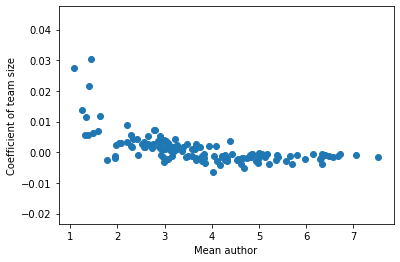

In [113]:
plt.scatter(Result_sig['Mean author'],Result_sig['NumberofAuth Coefficient'])
plt.xlabel('Mean author')
plt.ylabel('Coefficient of team size')
plt.savefig('regression.png')

In [ ]:
Cosine_distance_df.to_csv('/data02/MAG_PROCESSED_DATA/2019FILE/Cosine_distance_NormalizedName_2019.csv',index_label=False)

In [270]:
PaperId_FieldId_mathced_df[PaperId_FieldId_mathced_df['Score']==0]

,PaperId,FieldId,Score,NormalizedName
674203,188656914,96455323,0.0,arabic
969379,19706178,126322002,0.0,internal medicine
1665285,150737768,126322002,0.0,internal medicine
1868994,189092251,154945302,0.0,artificial intelligence
1893558,56582076,96455323,0.0,arabic
...,...,...,...,...
1539814370,3200715250,154945302,0.0,artificial intelligence
1539826667,3196755827,154945302,0.0,artificial intelligence
1539839151,3196761739,154945302,0.0,artificial intelligence
1539841807,3196763400,154945302,0.0,artificial intelligence


In [221]:
First_Level_Maintype  = FieldofStudy_df[FieldofStudy_df['Level']==1]

In [227]:
First_Level_Maintype_Id = set(First_Level_Maintype['FieldofstudyId'])

In [244]:
PaperId_FieldId_df

,PaperId,FieldId,Score
21340,7100,3116431,0.426446
21353,7100,143057031,0.432221
21366,7100,2779838221,0.483075
21379,7100,138921699,0.433691
21392,7100,94625758,0.459837
...,...,...,...
1539856982,3196778244,158622935,0.524382
1539856983,3196778244,177606310,0.476871
1539856984,3196778244,65244806,0.425076
1539856985,3196778244,33923547,0.372078


In [180]:
len(set(FieldofStudy_df['FieldofstudyId']))

144873

In [195]:
len(set(FieldofStudy_df['MainType']))

253

# MainType Regression

In [188]:
maintype_field_of_study = set(FieldofStudy_df['MainType'])

In [456]:
FieldofStudy_df[FieldofStudy_df['NormalizedName'].apply(lambda x: True if  'fundamental' in x else False)]

,FieldofstudyId,Rank,NormalizedName,DisplayName,MainType,Level,PaperCount,PaperFamilyCount,CitationCount,CreateDate
88922,78562435,13094,fundamental theorem of galois theory,Fundamental theorem of Galois theory,symbols.namesake,4,2635,2630,30097,2016-06-24


In [394]:
fieldid_normalizedname_dict = FieldofStudy_df[['FieldofstudyId','MainType']].set_index('FieldofstudyId').to_dict()['MainType']

In [401]:
PaperId_FieldId_mathced_df['Maintype']=PaperId_FieldId_mathced_df['FieldId'].apply(lambda x: fieldid_maintype_dict[x] )

/home/munj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [402]:
PaperId_FieldId_mathced_df['Score']==0

,PaperId,FieldId,Score,NormalizedName,Maintype
21431,7100,555826173,0.458501,democracy,media_common.quotation_subject
70062,206991815,35219183,0.432804,portuguese,language.human_language
70101,206991815,2780656516,0.428230,prison,media_common.quotation_subject
142620,188470451,2780848835,0.455508,telescope,law.invention
142646,188470451,2780722187,0.501149,silicon carbide,chemistry.chemical_compound
...,...,...,...,...,...
1539856823,3196778065,2777878899,0.644840,annulohypoxylon,biology.organism_classification
1539856826,3196778065,2780778831,0.473311,chitinase,biology.protein
1539856828,3196778065,2780034373,0.521076,leaf spot,biology.organism_classification
1539856981,3196778244,2776759703,0.373963,longevity,media_common.quotation_subject


In [405]:
Maintype_Paperid ={}

for key,value in tqdm(zip(PaperId_FieldId_mathced_df['Maintype'],PaperId_FieldId_mathced_df['PaperId'])):
    if key not in Maintype_Paperid:
        Maintype_Paperid[key]=[value]
    else:
        Maintype_Paperid[key].append(value)








0it [00:00, ?it/s]




134742it [00:00, 1347418.07it/s]




274754it [00:00, 1362806.74it/s]




423960it [00:00, 1399168.07it/s]




576753it [00:00, 1435455.35it/s]




729763it [00:00, 1462595.51it/s]




885709it [00:00, 1489479.94it/s]




1044908it [00:00, 1518818.88it/s]




1204638it [00:00, 1541540.69it/s]




1357291it [00:00, 1537003.70it/s]




1517389it [00:01, 1555650.39it/s]




1669393it [00:01, 1539353.36it/s]




1831150it [00:01, 1562009.61it/s]




1989727it [00:01, 1569061.96it/s]




2150718it [00:01, 1581096.39it/s]




2308053it [00:01, 1568522.80it/s]




2466499it [00:01, 1573268.40it/s]




2628170it [00:01, 1583097.13it/s]




2794988it [00:01, 1607695.86it/s]




2956634it [00:01, 1610314.42it/s]




3119537it [00:02, 1615879.66it/s]




3281095it [00:02, 1595115.28it/s]




3443501it [00:02, 1603687.97it/s]




3605163it [00:02, 1607542.83it/s]




3766037it [00:02, 1607899.95it/s]




3926848it [00:02, 1602793.60it/s]




4087146it [00:02, 1596393.45

In [407]:
Maintype_Meanvector = {}
for key in tqdm(Maintype_Paperid):
    if len(Maintype_Paperid[key])<1000:
        continue
    else:
        Maintype_Meanvector[key] = np.mean([paperid_vector_dict[x] for x in Maintype_Paperid[key] ],axis=0)
        






  0%|          | 0/225 [00:00<?, ?it/s]




  0%|          | 1/225 [00:04<18:29,  4.95s/it]




  1%|          | 2/225 [00:05<13:09,  3.54s/it]




  1%|▏         | 3/225 [00:11<16:29,  4.46s/it]




  2%|▏         | 4/225 [00:15<15:43,  4.27s/it]




  2%|▏         | 5/225 [00:16<11:55,  3.25s/it]




  3%|▎         | 6/225 [00:17<09:21,  2.56s/it]




  3%|▎         | 7/225 [00:36<27:24,  7.54s/it]




  4%|▎         | 8/225 [00:37<20:11,  5.58s/it]




  4%|▍         | 9/225 [00:37<14:22,  3.99s/it]




  4%|▍         | 10/225 [00:41<13:37,  3.80s/it]




  5%|▍         | 11/225 [00:41<10:09,  2.85s/it]




  5%|▌         | 12/225 [00:45<11:10,  3.15s/it]




  6%|▌         | 13/225 [00:45<07:58,  2.26s/it]




  6%|▌         | 14/225 [00:47<07:31,  2.14s/it]




  7%|▋         | 15/225 [00:48<05:49,  1.66s/it]




  7%|▋         | 16/225 [00:48<04:41,  1.35s/it]




  8%|▊         | 17/225 [00:49<03:51,  1.11s/it]




  8%|▊         | 18/225 [00:50<03:19,  1.04it/s]




  8%|▊

In [408]:
from scipy.spatial import distance

In [417]:
Cosine_distance_maintype = {}
for main_name in tqdm(Maintype_Meanvector.keys()):
    normalize_name_cosine={}
    mean_vector = Maintype_Meanvector[main_name]
    
    for paperid in Maintype_Paperid[main_name]:
        normalize_name_cosine[paperid] = distance.cosine(mean_vector,paperid_vector_dict[paperid])
    Cosine_distance_maintype[main_name] = normalize_name_cosine
  






  0%|          | 0/35 [00:00<?, ?it/s]




  3%|▎         | 1/35 [00:23<13:14, 23.37s/it]




  6%|▌         | 2/35 [00:25<09:16, 16.88s/it]




  9%|▊         | 3/35 [01:03<12:28, 23.40s/it]




 11%|█▏        | 4/35 [01:34<13:09, 25.47s/it]




 14%|█▍        | 5/35 [01:40<09:54, 19.82s/it]




 17%|█▋        | 6/35 [01:47<07:43, 15.99s/it]




 20%|██        | 7/35 [03:30<19:38, 42.08s/it]




 23%|██▎       | 8/35 [03:39<14:24, 32.04s/it]




 26%|██▌       | 9/35 [03:41<09:59, 23.07s/it]




 29%|██▊       | 10/35 [04:09<10:17, 24.71s/it]




 31%|███▏      | 11/35 [04:14<07:29, 18.74s/it]




 34%|███▍      | 12/35 [04:49<08:57, 23.39s/it]




 37%|███▋      | 13/35 [04:50<06:09, 16.79s/it]




 40%|████      | 14/35 [05:06<05:51, 16.73s/it]




 43%|████▎     | 15/35 [05:11<04:22, 13.10s/it]




 46%|████▌     | 16/35 [05:16<03:21, 10.58s/it]




 49%|████▊     | 17/35 [05:20<02:37,  8.76s/it]




 51%|█████▏    | 18/35 [05:25<02:08,  7.53s/it]




 54%|█████▍    | 19/35 [0

In [416]:
Cosine_distance_maintype

,PaperId,Cosine_Distance


In [439]:
Result_main = []
for name in tqdm(Cosine_distance_maintype):

    print(name)
    
    
    Cosine_distance_maintype_temp = pd.DataFrame(Cosine_distance_maintype[name].items(),columns=['PaperId','Cosine_Distance'])
    
    if len(Cosine_distance_maintype_temp)<1000:
        continue
    Cosine_distance_maintype_temp= Cosine_distance_maintype_temp[Cosine_distance_maintype_temp['PaperId'].apply(lambda x: True if x in paperid_numberofauth else False)]
    
    Cosine_distance_maintype_temp['Numberofauth']=Cosine_distance_maintype_temp['PaperId'].apply(lambda x: paperid_numberofauth[x])
    threshold = Cosine_distance_maintype_temp['Numberofauth'].quantile(0.99) 
    
    Cosine_distance_maintype_temp = Cosine_distance_maintype_temp[Cosine_distance_maintype_temp['Numberofauth'].apply(lambda x: True if x<threshold+1 else False)]
    
    mean_author = Cosine_distance_maintype_temp['Numberofauth'].mean()
    
    mod = smf.ols(formula='Cosine_Distance ~ Numberofauth', data=Cosine_distance_maintype_temp)

    res = mod.fit()
    
    
    Result_main.append({"NormalizedName" :name,'NumberofAuth Coefficient': res.params['Numberofauth'],'NumberofAuth pvalue':  res.pvalues['Numberofauth'],"Mean author":mean_author, "Observations": len(Cosine_distance_maintype_temp)})






  0%|          | 0/35 [00:00<?, ?it/s]

media_common.quotation_subject







  3%|▎         | 1/35 [00:01<00:49,  1.45s/it]




  6%|▌         | 2/35 [00:01<00:35,  1.07s/it]

language.human_language
law.invention







  9%|▊         | 3/35 [00:04<00:49,  1.55s/it]

chemistry.chemical_compound







 11%|█▏        | 4/35 [00:06<00:52,  1.69s/it]

visual_art.visual_art_medium







 14%|█▍        | 5/35 [00:06<00:40,  1.36s/it]

geography.geographical_feature_category







 17%|█▋        | 6/35 [00:07<00:33,  1.14s/it]

business.industry







 20%|██        | 7/35 [00:13<01:16,  2.73s/it]

computer.software_genre







 23%|██▎       | 8/35 [00:14<00:56,  2.10s/it]

computer.programming_language







 26%|██▌       | 9/35 [00:14<00:39,  1.54s/it]

medicine.medical_specialty







 29%|██▊       | 10/35 [00:16<00:40,  1.61s/it]

medicine.disease_cause







 31%|███▏      | 11/35 [00:17<00:30,  1.26s/it]

medicine.disease







 34%|███▍      | 12/35 [00:18<00:32,  1.42s/it]




 37%|███▋      | 13/35 [00:19<00:23,  1.08s/it]

medicine.drug_class
biology.organism_classification







 40%|████      | 14/35 [00:20<00:23,  1.13s/it]

symbols.namesake







 43%|████▎     | 15/35 [00:20<00:18,  1.06it/s]

biology.protein







 46%|████▌     | 16/35 [00:21<00:14,  1.28it/s]

medicine.diagnostic_test







 49%|████▊     | 17/35 [00:21<00:11,  1.51it/s]

education.field_of_study







 51%|█████▏    | 18/35 [00:22<00:10,  1.69it/s]

medicine.symptom







 54%|█████▍    | 19/35 [00:22<00:09,  1.64it/s]

medicine.anatomical_structure







 57%|█████▋    | 20/35 [00:23<00:10,  1.46it/s]

chemistry.chemical_classification







 60%|██████    | 21/35 [00:24<00:09,  1.55it/s]

engineering.material







 63%|██████▎   | 22/35 [00:24<00:07,  1.63it/s]

medicine.drug







 66%|██████▌   | 23/35 [00:25<00:07,  1.69it/s]

business.product_category







 69%|██████▊   | 24/35 [00:25<00:06,  1.67it/s]

medicine.medical_treatment







 71%|███████▏  | 25/35 [00:26<00:06,  1.62it/s]

chemistry.chemical_element







 74%|███████▍  | 26/35 [00:27<00:05,  1.57it/s]




 80%|████████  | 28/35 [00:27<00:03,  2.16it/s]

computer.file_format
media_common.cataloged_instance
biology.animal
computer.internet_protocol
food.ingredient







 89%|████████▊ | 31/35 [00:27<00:01,  2.94it/s]




100%|██████████| 35/35 [00:27<00:00,  1.27it/s]

medicine.artery
ved/biology.organism_classification_rank.species
food.food
medicine.vein


In [440]:
Result_main = pd.DataFrame(Result_main)

In [435]:
Result_main

,NormalizedName,NumberofAuth Coefficient,NumberofAuth pvalue,Mean author,Observations
31,medicine.artery,-0.000182,0.175850,5.900691,12295
34,medicine.vein,-0.000336,0.538944,5.723502,1085


In [442]:
Result_main.to_csv('regression_result.csv')

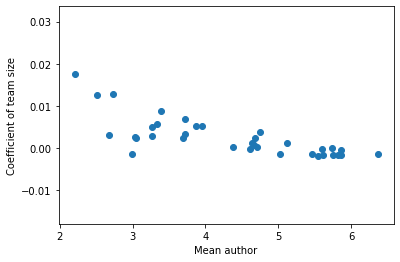

In [441]:
plt.scatter(Result_main['Mean author'],Result_main['NumberofAuth Coefficient'])
plt.xlabel('Mean author')
plt.ylabel('Coefficient of team size')
plt.savefig('regression : maintype')

In [443]:
Result_main

,NormalizedName,NumberofAuth Coefficient,NumberofAuth pvalue,Mean author,Observations
0,media_common.quotation_subject,0.012552,0.000000e+00,2.514545,534091
1,language.human_language,0.017487,0.000000e+00,2.202346,47740
2,law.invention,0.008797,0.000000e+00,3.392469,955173
3,chemistry.chemical_compound,0.003792,0.000000e+00,4.747314,573826
4,visual_art.visual_art_medium,0.005612,0.000000e+00,3.336769,165894
5,geography.geographical_feature_category,0.004910,0.000000e+00,3.265252,190317
6,business.industry,0.005262,0.000000e+00,3.873714,2552855
7,computer.software_genre,0.002923,0.000000e+00,3.270955,205126
8,computer.programming_language,0.002345,1.379290e-105,3.049834,58474
9,medicine.medical_specialty,-0.001589,0.000000e+00,5.621099,599682


In [167]:
maintype_sort = FieldofStudy_df.groupby('MainType')['PaperCount'].sum()

In [208]:
FieldofStudy_df.groupby('MainType').count()

,FieldofstudyId,Rank,NormalizedName,DisplayName,Level,PaperCount,PaperFamilyCount,CitationCount,CreateDate
MainType,,,,,,,,,
american_football.player,1,1,1,1,1,1,1,1,1
american_football.team,1,1,1,1,1,1,1,1,1
amusement_parks.roller_coaster,1,1,1,1,1,1,1,1,1
architecture.building,1,1,1,1,1,1,1,1,1
architecture.building_function,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...
visual_art.visual_artist,2,2,2,2,2,2,2,2,2
wine.grape_variety,12,12,12,12,12,12,12,12,12
wine.wine,1,1,1,1,1,1,1,1,1


In [168]:
import time

In [169]:
from tqdm import tqdm

In [191]:
maintype_paperid = {}
for field in tqdm(maintype_field_of_study):
    
 


        paperid_list = []
        fieldofstudyid_set = set(FieldofStudy_df[FieldofStudy_df['MainType'] ==field]['FieldofstudyId'])
        
        
        paperid_list = list(PaperId_best_FieldId_df[PaperId_best_FieldId_df['FieldId'].apply(lambda x: True if x in fieldofstudyid_set else False) ]['PaperId'])
 
   


        maintype_paperid[field] = paperid_list

            
    
        




  0%|          | 0/253 [00:00<?, ?it/s]


  0%|          | 1/253 [00:01<06:46,  1.61s/it]


  1%|          | 2/253 [00:03<06:40,  1.60s/it]


  1%|          | 3/253 [00:04<06:42,  1.61s/it]


  2%|▏         | 4/253 [00:06<06:57,  1.68s/it]


  2%|▏         | 5/253 [00:08<06:57,  1.68s/it]


  2%|▏         | 6/253 [00:09<06:52,  1.67s/it]


  3%|▎         | 7/253 [00:11<06:45,  1.65s/it]


  3%|▎         | 8/253 [00:13<06:41,  1.64s/it]


  4%|▎         | 9/253 [00:14<06:38,  1.63s/it]


  4%|▍         | 10/253 [00:16<06:37,  1.64s/it]


  4%|▍         | 11/253 [00:18<06:48,  1.69s/it]


  5%|▍         | 12/253 [00:19<06:49,  1.70s/it]


  5%|▌         | 13/253 [00:21<06:40,  1.67s/it]


  6%|▌         | 14/253 [00:23<06:32,  1.64s/it]


  6%|▌         | 15/253 [00:24<06:24,  1.62s/it]


  6%|▋         | 16/253 [00:26<06:18,  1.60s/it]


  7%|▋         | 17/253 [00:28<06:28,  1.65s/it]


  7%|▋         | 18/253 [00:29<06:31,  1.66s/it]


  8%|▊         | 19/253 [00:31<06:26,  1.65s/i

In [192]:
len(maintype_paperid.keys())#23 : 10000, 27: 5000, 34:1000,

253

In [196]:
total = []
for key in maintype_paperid.keys():
    print(key, ":",len(maintype_paperid[key]))
    total+=maintype_paperid[key]
    print("-----------------------")

architecture.structure : 1
-----------------------
language.conlang : 0
-----------------------
olympics.event_competition : 0
-----------------------
computer.software : 9
-----------------------
media_common.cataloged_instance : 7107
-----------------------
geography.mountaineer : 4
-----------------------
computer.software_genre : 16340
-----------------------
people.american_indian_group : 4
-----------------------
meteorology.tropical_cyclone : 1
-----------------------
event.disaster : 0
-----------------------
religion.religious_organization : 37
-----------------------
engineering.material : 41758
-----------------------
book.periodical : 14
-----------------------
sports.professional_sports_team : 0
-----------------------
games.playing_card_game : 1
-----------------------
biology.plant_disease : 3
-----------------------
visual_art.visual_art_medium : 29812
-----------------------
business.product_category : 67677
-----------------------
medicine.condition_prevention_factors

In [198]:
total= set(total)

In [205]:
len(total)

1517961

In [201]:
PaperId_best_FieldId_df[PaperId_best_FieldId_df['PaperId'].apply(lambda x: True if x not in total else False)]

,PaperId,FieldId,Score
21366,7100,2779838221,0.483075
70075,206991815,2778571376,0.467897
160171,150193134,15708023,0.407507
196269,19424966,15708023,0.410785
247470,131496847,2778272461,0.763134
...,...,...,...
1539855971,3196777268,2777639085,0.463859
1539856168,3196777431,55581612,0.455906
1539856506,3196777747,13376991,0.531868
1539856667,3196777896,29712632,0.713016


In [204]:
FieldofStudy_df[FieldofStudy_df['FieldofstudyId']==1534001529]

,FieldofstudyId,Rank,NormalizedName,DisplayName,MainType,Level,PaperCount,PaperFamilyCount,CitationCount,CreateDate


In [128]:
PaperId_best_FieldId_df[PaperId_best_FieldId_df['FieldId'] == 2779838221]

,PaperId,FieldId,Score
21366,7100,2779838221,0.483075
102453310,1418708771,2779838221,0.551150
151843232,1534001529,2779838221,0.560063
896882799,2598567701,2779838221,0.652930
949449692,2791475077,2779838221,0.546269
...,...,...,...
1466536411,3134476872,2779838221,0.563332
1483882935,3178989037,2779838221,0.514729
1511791783,3172603063,2779838221,0.521036
1514197987,3164553032,2779838221,0.505653
